# EDA

## STEP 1. Import libraries and load data

In [60]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [62]:
data = pd.read_excel('/content/경로별_소요시간_20241202.xlsx')

## STEP2. Inspect the data

이 테이블은 센터원부터 코엑스 사이의 경로유형, 시간, 날짜 와 같은 세부 정보를 포함하고 있다.


*   날짜: 2024-11-01 ~ 2024-11-28
*   시간: 00:00라면 0으로 표시, 12:00라면 1200으로 표시(00:00~23:55)
*   경로 유형: 센터원 to 코엑스 대표 경로 3가지(A, B, C)
*   소요시간: 센터원 to 코엑스 소요시간(분)


In [63]:
data.head()

,날짜,시간,경로유형,소요시간
0,20241101,0,A,16.310933
1,20241101,0,B,20.241982
2,20241101,0,C,22.631307
3,20241101,5,A,16.317805
4,20241101,5,B,20.703033


In [64]:
data.tail()

,날짜,시간,경로유형,소요시간
16399,20241128,2350,B,22.142643
16400,20241128,2350,C,22.690249
16401,20241128,2355,A,17.060813
16402,20241128,2355,B,21.395654
16403,20241128,2355,C,23.267316


In [65]:
# 결측치 확인
data.isnull().sum()

,0
날짜,0
시간,0
경로유형,0
소요시간,0


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16404 entries, 0 to 16403
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      16404 non-null  int64  
 1   시간      16404 non-null  int64  
 2   경로유형    16404 non-null  object 
 3   소요시간    16404 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 512.8+ KB


시간, 날짜의 형식을 변경하고 요일 데이터를 추출하여 매핑하였다.

In [67]:
def format_time(x):
    hour = x // 100
    minute = x % 100
    return f'{hour:02d}:{minute:02d}'

In [68]:
#시간을 HH:mm 형식으로 변환
data['시간'] = data['시간'].apply(format_time)

# 날짜를 datetime 형식으로 변환
data['날짜'] = pd.to_datetime(data['날짜'], format='%Y%m%d')

# 요일 추출 (월요일=0, 일요일=6) 및 매핑
days = {0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}
data['요일'] = data['날짜'].dt.dayofweek.map(days)

In [69]:
data.head()

,날짜,시간,경로유형,소요시간,요일
0,2024-11-01,00:00,A,16.310933,금
1,2024-11-01,00:00,B,20.241982,금
2,2024-11-01,00:00,C,22.631307,금
3,2024-11-01,00:05,A,16.317805,금
4,2024-11-01,00:05,B,20.703033,금


## STEP 3. Visualization

### 경로 유형별 소요시간 분포

*    **경로 A**: 일부 데이터는 평균보다 훨씬 더 긴 시간이 소요되었음을 확인 할 수 있다. 다른 경로보다 이상치가 더 많이 분포하며, 이상치의 범위가 넓다. 소요 시간의 변동성이 다른 경로들 보다 크다는 것을 확인할 수 있다. 경로 A의 특정 조건 또는 시간대에 교통 정체나 다른 변수가 소요 시간에 크게 영향을 미칠 수 있음을 의미한다.
*   **경로 B**: 경로 B 역시 비슷한 중앙값을 보이지만, 소요 시간이 20분에서 40분 사이에 집중되어 있으나, 50분 이상 소요되는 경우도 관찰된다.
*   **경로 C**: 비교적 이상치가 적고 소요 시간의 분포가 다른 두 경로에 비해 안정적이다. 소요 시간은 대체로 20분에서 40분 사이에 집중되어 있다.

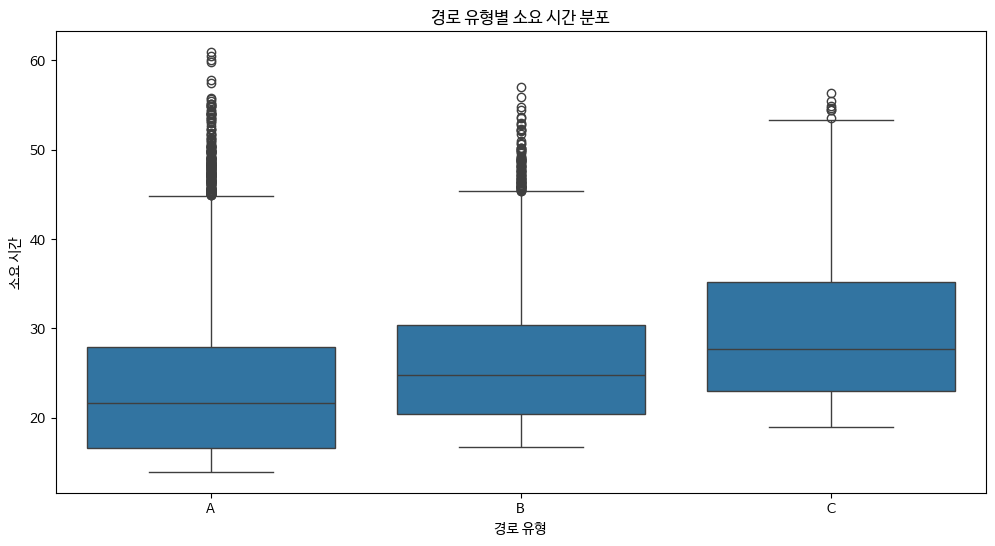

In [70]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='경로유형', y='소요시간', data=data)
plt.title('경로 유형별 소요 시간 분포')
plt.xlabel('경로 유형')
plt.ylabel('소요 시간')
plt.show()

### 요일별 소요시간 분포

**1. 이상치**

토요일에 소요 시간의 이상치가 가장 적게 나타나고 있다.
월요일, 화요일, 목요일에 이상치의 수가 비교적 많으며, 금요일의 최대치가 가장 높은 값을 나타낸다.


**2. 중앙값**

모든 요일의 중앙값은 대체로 30분 내외로 안정적이다. 일요일의 중앙값이 가장 낮으며, 화요일과 금요일이 상대적으로 높다.

**3. 박스의 크기**

일요일은 박스의 크기가 가장 작아, 데이터의 분산이 가장 적은 것을 확인 할 수 있다. 즉, 일요일의 소요 시간이 다른 요일에 비해 일관적이다.
반면, 금요일은 박스의 크기가 크므로 소요 시간의 분산이 커, 다른 요일에 비해 소요시간이 일관적이지 않다.

**4. 수염**

금요일의 수염이 상대적으로 길게 나타나고 있어, 소요 시간이 상위 및 하위 범위에서 넓게 분포하고 있음을 확인 할 수 있다.

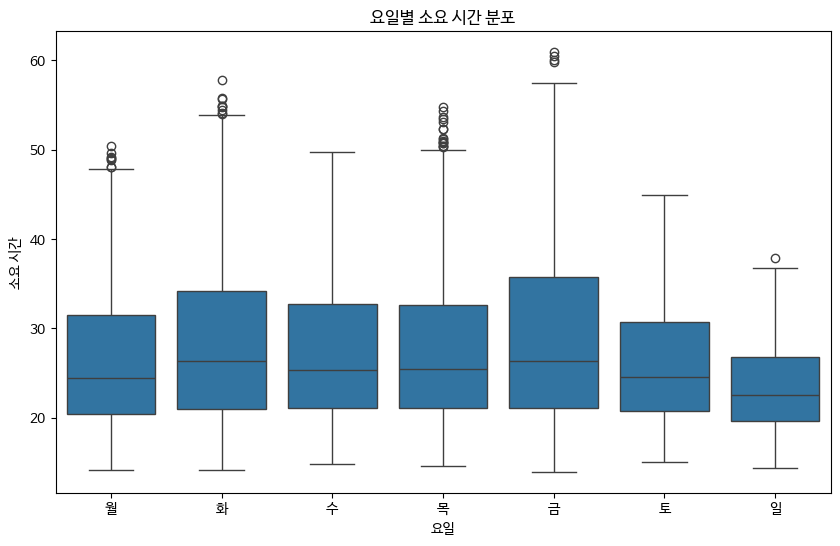

In [71]:
day_order = ['월', '화', '수', '목', '금', '토', '일']
data['요일'] = pd.Categorical(data['요일'], categories=day_order, ordered=True)

plt.figure(figsize=(10, 6))
sns.boxplot(x='요일', y='소요시간', data=data)
plt.title('요일별 소요 시간 분포')
plt.xlabel('요일')
plt.ylabel('소요 시간')
plt.show()

### 시간대별 소요시간 분포

**1. 시간대별 변동성**

오전 시간대(특히 05:00에서 10:00 사이)와 늦은 오후와 저녁 시간대(특히 15:00에서 19:00 사이)에 소요 시간의 변동성이 크게 증가하고있다. 이는 출근 시간과 퇴근 시간에 교통량이 많아져 소요 시간이 늘어나는 것을 의미한다.

**2. 소요 시간의 분포**

밤 시간대는 소요 시간의 중앙값이 상대적으로 낮고, 분포도 좁은 편이다. 이는 밤 시간에는 도로가 비교적 원활하다는 것을 의미한다.
오전과 오후 시간대에는 소요 시간의 중앙값이 높고, 분포의 폭도 넓다. 특히 이상치의 수가 많아지며, 소요 시간이 예상보다 훨씬 높게 나타나는 경우가 많다.

**3. 이상치의 분포**

이상치는 주로 출근 시간대와 늦은 오후, 퇴근 시간대에 집중적으로 나타난다. 이는 일부 날들에 교통 사고나 특별한 사건으로 인해 평소보다 훨씬 많은 시간이 소요되었음을 의미한다.

**4. 전반적인 추세**

소요 시간은 전반적으로 오전에 서서히 증가하기 시작하여 오후에 최고점에 도달한 뒤 저녁에 다시 감소하는 추세를 보인다. 이 패턴은 출퇴근 시간의 영향을 잘 보여주고 있다.

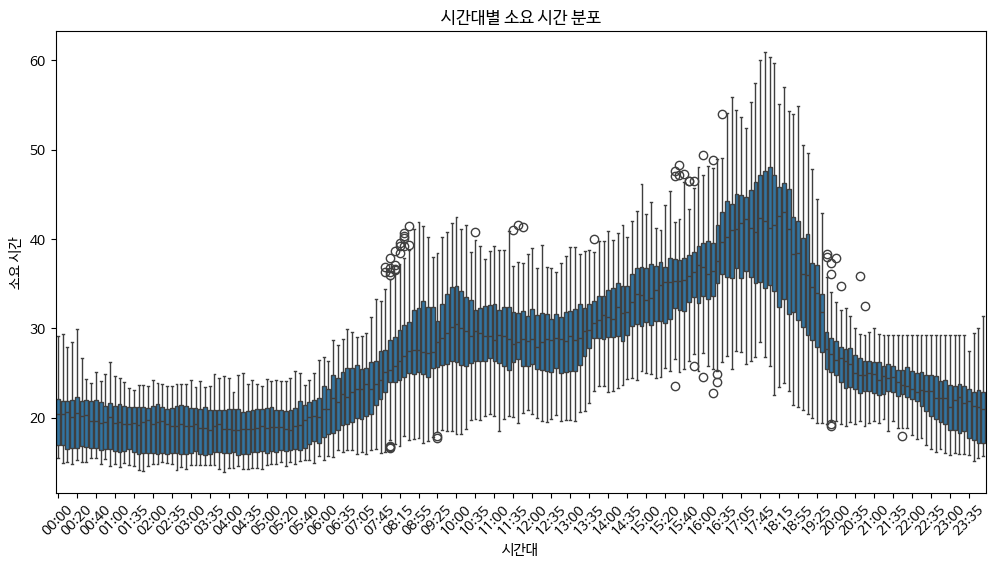

In [72]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='시간', y='소요시간', data=data)
plt.title('시간대별 소요 시간 분포')
plt.xlabel('시간대')
plt.ylabel('소요 시간')

# x축 라벨 각도 조정 및 라벨 간격 조정
plt.xticks(rotation=45)
ax = plt.gca()
labels = ax.get_xticklabels()

# x축 라벨을 매 4개마다만 표시
ax.set_xticks(ax.get_xticks()[::4])
ax.set_xticklabels([label.get_text() for label in labels][::4])

plt.show()

### 출퇴근 시간대별 소요 시간 분포

**1. 출근 시간:**

몇몇 이상치가 상위에 존재한다. 이는 특정 날에 교통 체증이나 다른 요인으로 인해 평소보다 훨씬 긴 소요 시간이 발생했음을 나타낸다.

**2. 비출퇴근 시간:**

상대적으로 이상치가 더 많이 관찰되고, 상대적으로 넓게 퍼져 있다. 이는 출퇴근시간대에 비해 긴 시간대의 데이터 분포이기에 넓은 분포와 이상치를 나타내는 것으로 예상해볼 수 있다.

**3. 퇴근 시간:**

소요 시간의 중앙값이 가장 높고, 박스의 크기가 가장 작아 전반적으로 소요 시간이 가장 길고 일관된 경향을 보인다.

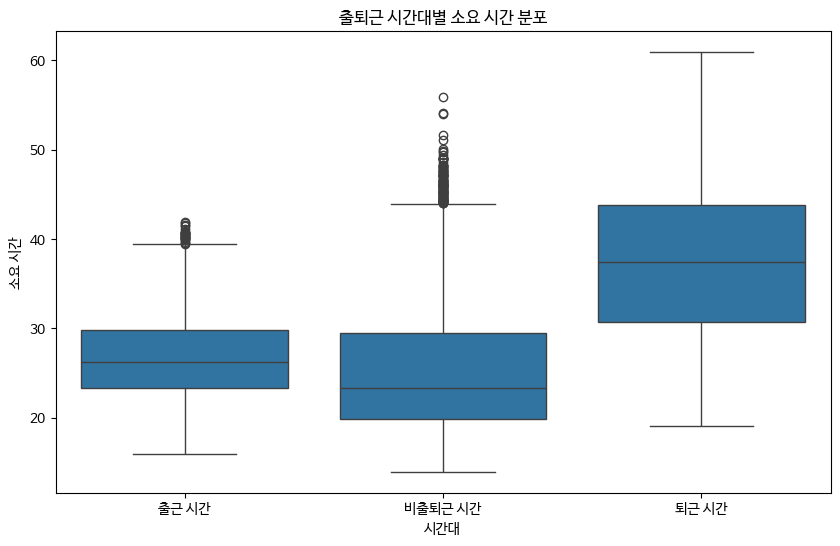

In [73]:
data['시간'] = pd.to_datetime(data['시간'], format='%H:%M').dt.time

# 출근 시간과 퇴근 시간 정의
출근시간_시작 = pd.Timestamp('07:00').time()
출근시간_종료 = pd.Timestamp('09:59').time()
퇴근시간_시작 = pd.Timestamp('17:00').time()
퇴근시간_종료 = pd.Timestamp('19:59').time()

# 시간대 분류
data['시간대'] = data['시간'].apply(
    lambda x: '출근 시간' if 출근시간_시작 <= x <= 출근시간_종료
    else ('퇴근 시간' if 퇴근시간_시작 <= x <= 퇴근시간_종료 else '비출퇴근 시간')
)

plt.figure(figsize=(10, 6))
sns.boxplot(x='시간대', y='소요시간', data=data, order=['출근 시간', '비출퇴근 시간', '퇴근 시간'])
plt.title('출퇴근 시간대별 소요 시간 분포')
plt.xlabel('시간대')
plt.ylabel('소요 시간')
plt.show()

### 요일별 출퇴근 소요 시간 분포

비교적 월요일 부터 금요일 까지(평일)에는 일관된 출퇴근 소요시간 분포를 보인다.

월요일과 금요일에 출퇴근 소요시간 최대값이 가장 큰 값을 가지는 것으로 나타난다.

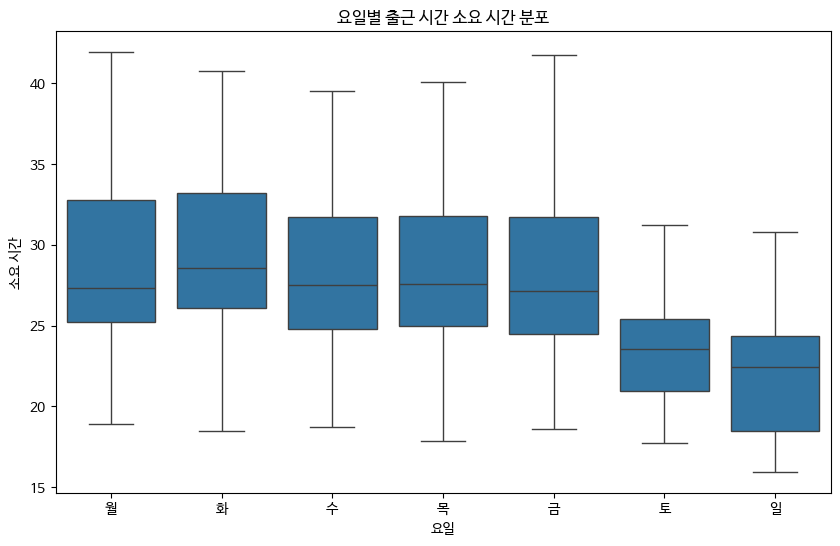

In [74]:
# 출근 시간 정의
출근시간_시작 = pd.Timestamp('07:00').time()
출근시간_종료 = pd.Timestamp('09:59').time()

# 요일별 출근 시간대 데이터 필터링
출근시간_데이터 = data[(data['시간'] >= 출근시간_시작) & (data['시간'] <= 출근시간_종료)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='요일', y='소요시간', data=출근시간_데이터)
plt.title('요일별 출근 소요 시간 분포')
plt.xlabel('요일')
plt.ylabel('소요 시간')
plt.show()

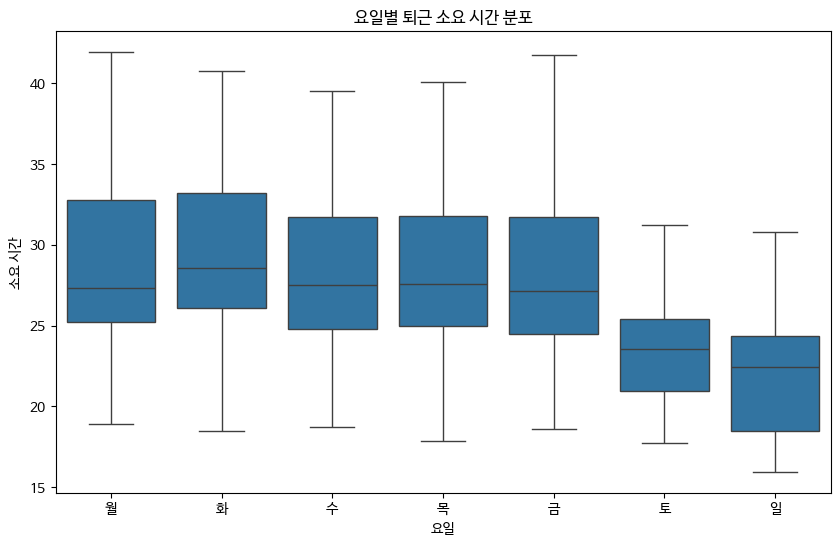

In [75]:
# 퇴근 시간 정의
퇴근시간_시작 = pd.Timestamp('07:00').time()
퇴근시간_종료 = pd.Timestamp('09:59').time()

# 요일별 퇴근 시간대 데이터 필터링
퇴근시간_데이터 = data[(data['시간'] >= 퇴근시간_시작) & (data['시간'] <= 퇴근시간_종료)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='요일', y='소요시간', data=퇴근시간_데이터)
plt.title('요일별 퇴근 소요 시간 분포')
plt.xlabel('요일')
plt.ylabel('소요 시간')
plt.show()

### 경로 유형과 요일의 관련성 분석

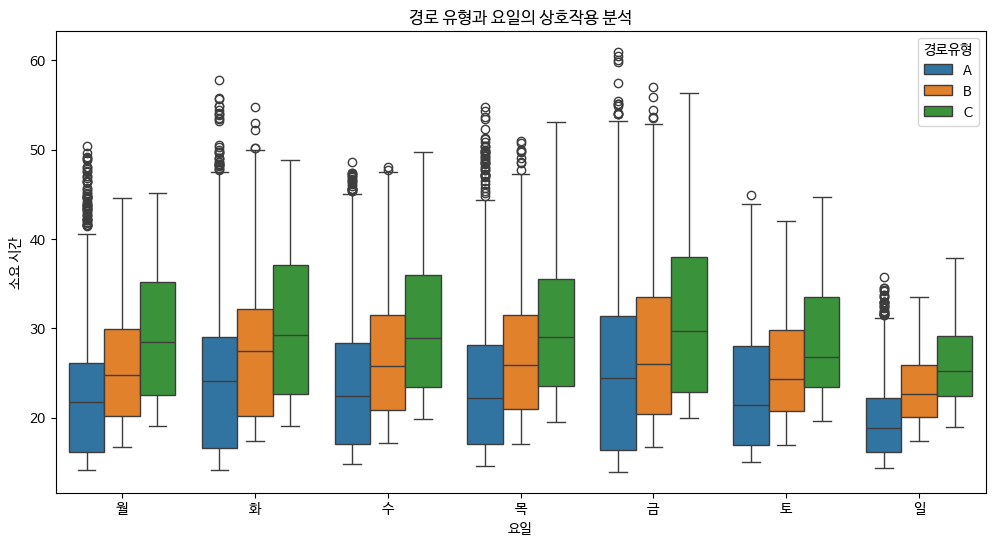

In [76]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='요일', y='소요시간', hue='경로유형', data=data)
plt.title('경로 유형과 요일의 관련성 분석')
plt.xlabel('요일')
plt.ylabel('소요 시간')
plt.show()